# Random Forest Student Performance 

# Data Preprocessing and Engineering

# IMPORT ALL THE NECESSARY LIBRARIES

In [55]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

# LOAD THE DATASET

In [56]:
#Import Data
df = pd.read_csv("student_performance_dataset.csv")
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


# EXPLORE THE DATASET

In [57]:
#Dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  708 non-null    object 
 1   Gender                      708 non-null    object 
 2   Study_Hours_per_Week        708 non-null    int64  
 3   Attendance_Rate             708 non-null    float64
 4   Past_Exam_Scores            708 non-null    int64  
 5   Parental_Education_Level    708 non-null    object 
 6   Internet_Access_at_Home     708 non-null    object 
 7   Extracurricular_Activities  708 non-null    object 
 8   Final_Exam_Score            708 non-null    int64  
 9   Pass_Fail                   708 non-null    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 55.4+ KB
None


# CHECK FOR MISSING VALUES

In [58]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64


# CENTRAL TENDENCY ANALYSIS

In [59]:
# Central tendency and spread
mean_vals = df.mean(numeric_only=True)
median_vals = df.median(numeric_only=True)
std_vals = df.std(numeric_only=True)

# Summary stats
print("\n~ Descriptive Statistics ")
display(df.describe())


~ Descriptive Statistics 


,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Final_Exam_Score
count,708.000000,708.000000,708.000000,708.000000
mean,26.132768,78.107722,77.871469,58.771186
std,8.877727,13.802802,14.402739,6.705877
min,10.000000,50.116970,50.000000,50.000000
25%,19.000000,67.550094,65.000000,52.000000
50%,27.000000,79.363046,79.000000,59.500000
75%,34.000000,89.504232,91.000000,64.000000
max,39.000000,99.967675,100.000000,77.000000


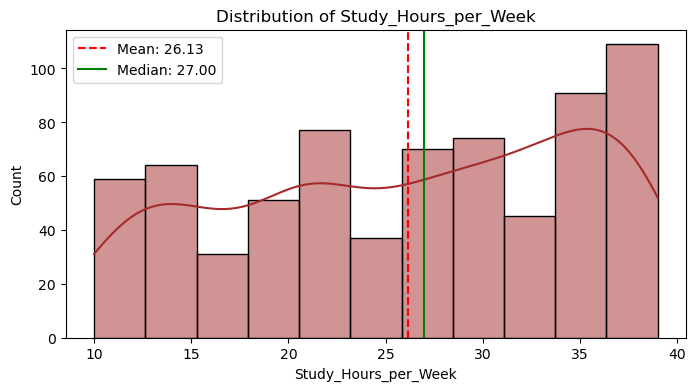

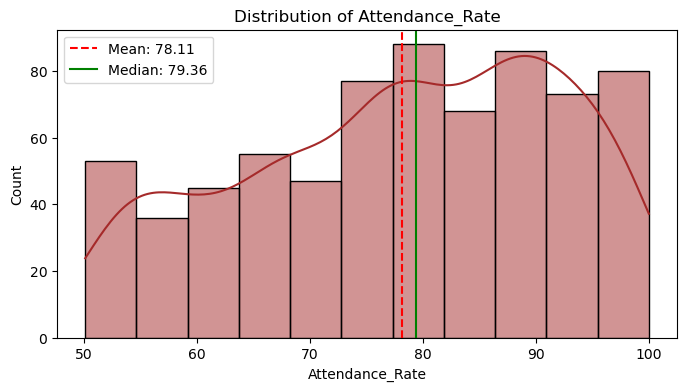

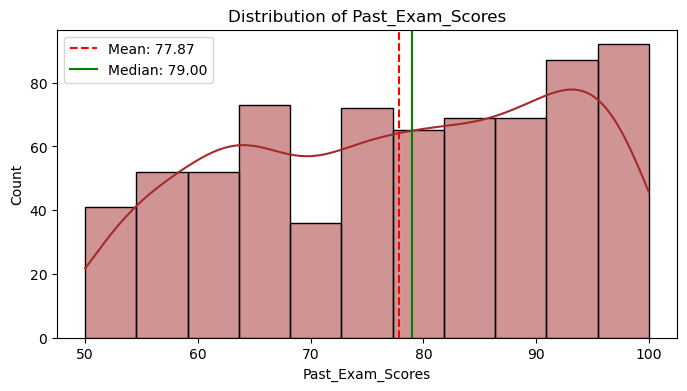

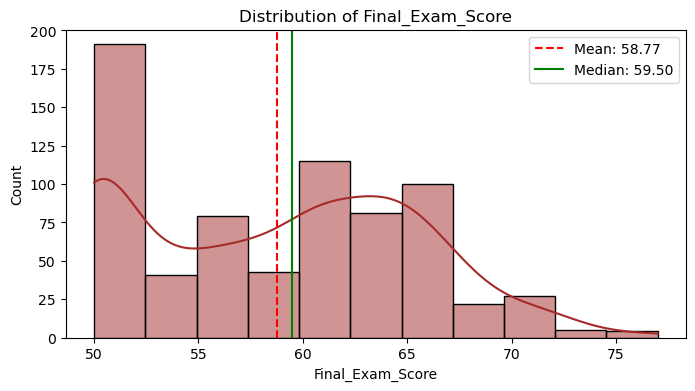

In [60]:
# Visualize distributions to compare with central tendency
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, color='brown')
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f"Mean: {df[col].mean():.2f}")
    plt.axvline(df[col].median(), color='green', linestyle='-', label=f"Median: {df[col].median():.2f}")
    plt.title(f"Distribution of {col}")
    plt.legend()
    plt.show()

# IDENTIFY NUMERIC & CATEGORICAL FEATURES

In [61]:
# Identify numeric and categorical features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['Study_Hours_per_Week', 'Attendance_Rate', 'Past_Exam_Scores', 'Final_Exam_Score']
Categorical columns: ['Student_ID', 'Gender', 'Parental_Education_Level', 'Internet_Access_at_Home', 'Extracurricular_Activities', 'Pass_Fail']


# DROP UNNECESSARY COLUMNS

In [62]:
# Drop non-informative columns
df = df.drop(columns=['Student_ID', 'Pass_Fail'], errors='ignore')
print(df.duplicated().sum())
df = df.drop_duplicates()
df.head()

208


,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score
0,Male,31,68.267841,86,High School,Yes,Yes,63
1,Male,16,78.222927,73,PhD,No,No,50
2,Female,21,87.525096,74,PhD,Yes,No,55
3,Female,27,92.076483,99,Bachelors,No,No,65
4,Female,37,98.655517,63,Masters,No,Yes,70


# ENCODE CATEGORICAL COLUMNS TO NUMERICAL VALUES

In [63]:
# Encode categorical columns to numerical values
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    
df.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score
0,1,31,68.267841,86,1,1,1,63
1,1,16,78.222927,73,3,0,0,50
2,0,21,87.525096,74,3,1,0,55
3,0,27,92.076483,99,0,0,0,65
4,0,37,98.655517,63,2,0,1,70


# OUTLIER ANALYSIS

Number of outliers per numeric column (|z| > 3):

Study_Hours_per_Week    0
Attendance_Rate         0
Past_Exam_Scores        0
Final_Exam_Score        2
dtype: int64

Percentage of outliers per column:

Study_Hours_per_Week    0.0
Attendance_Rate         0.0
Past_Exam_Scores        0.0
Final_Exam_Score        0.4
dtype: float64


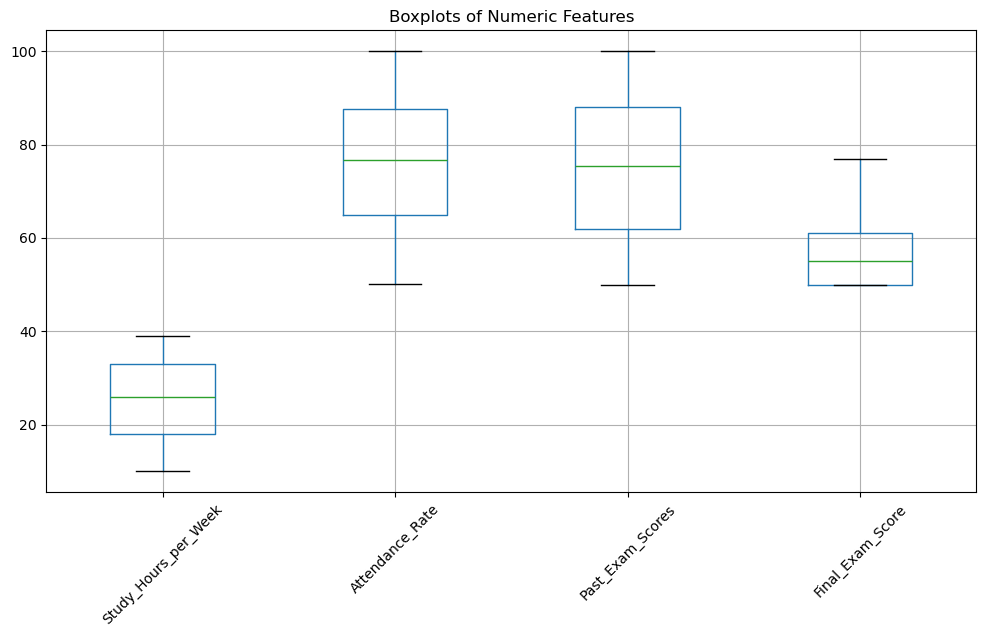

In [64]:
# Compute z-scores
z_scores = np.abs(stats.zscore(df[numeric_cols]))
z_score_threshold = 3

# Count outliers per feature
outlier_counts = (z_scores > z_score_threshold).sum(axis=0)
print("Number of outliers per numeric column (|z| > 3):\n")
print(outlier_counts)

# Calculate percentage of outliers per column
outlier_percentage = (outlier_counts / len(df)) * 100
print("\nPercentage of outliers per column:\n")
print(outlier_percentage.round(2))

# Visualize outliers using boxplots 
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot(rot=45)
plt.title("Boxplots of Numeric Features")
plt.show()

# CHECK FEATURE CORRELATIONS

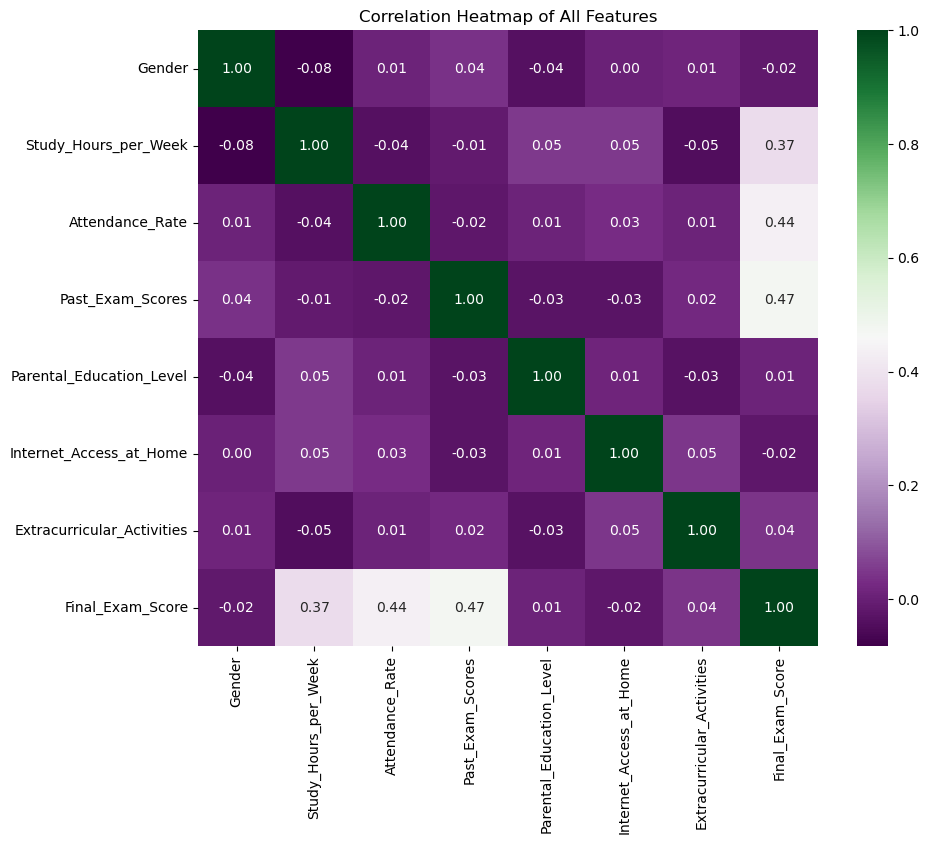

In [65]:
# Check feature correlations using r2
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="PRGn", fmt=".2f")
plt.title("Correlation Heatmap of All Features")
plt.show()


# VISUALIZE FEATURE DISTRIBUTION

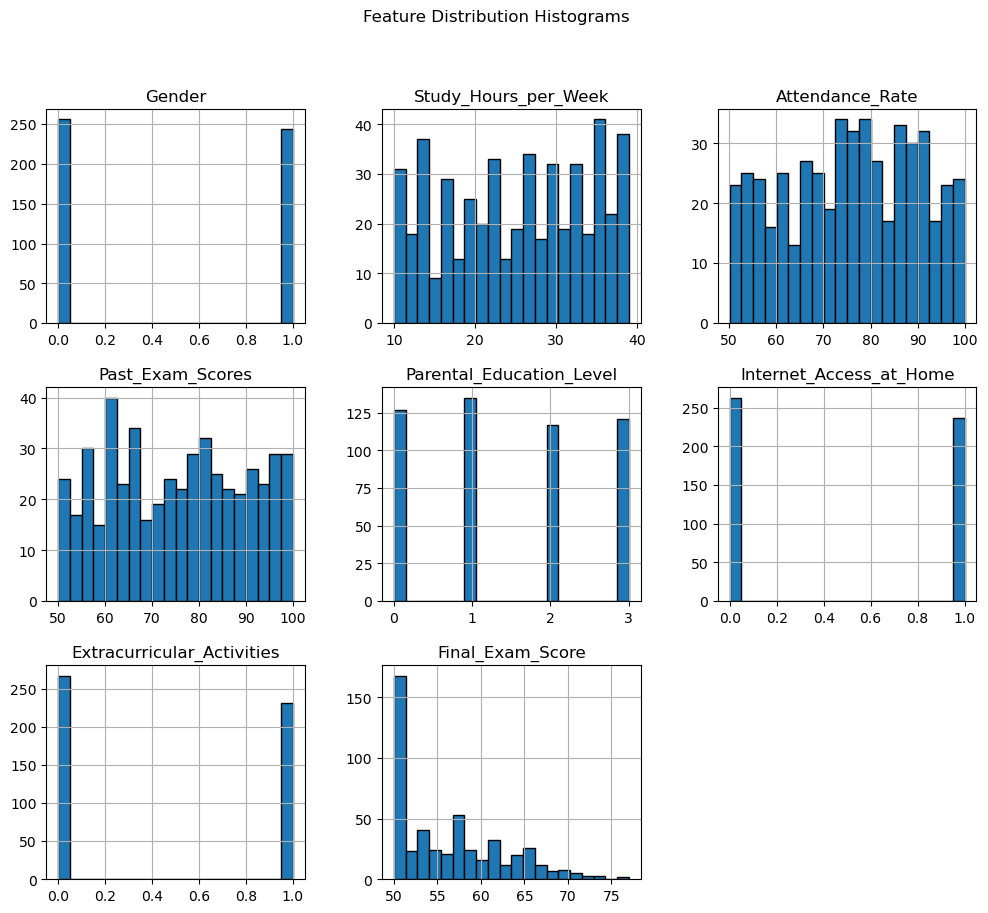

In [66]:
# Visualize feature distributions
df.hist(figsize=(12,10), bins=20, edgecolor='black')
plt.suptitle("Feature Distribution Histograms")
plt.show()


# MODEL TRAINING

In [67]:
# Split data
X = df.drop(columns=['Final_Exam_Score'])
y = df['Final_Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (400, 7)
Test set shape: (100, 7)


# MODEL PERFORMANCE

In [68]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 3.33
Mean Squared Error (MSE): 19.86
Root Mean Squared Error (RMSE): 4.46
R² Score: 0.3995


# FEATURE IMPORTANCE

C:\Users\Apostle\AppData\Local\Temp\ipykernel_25288\1227721663.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')


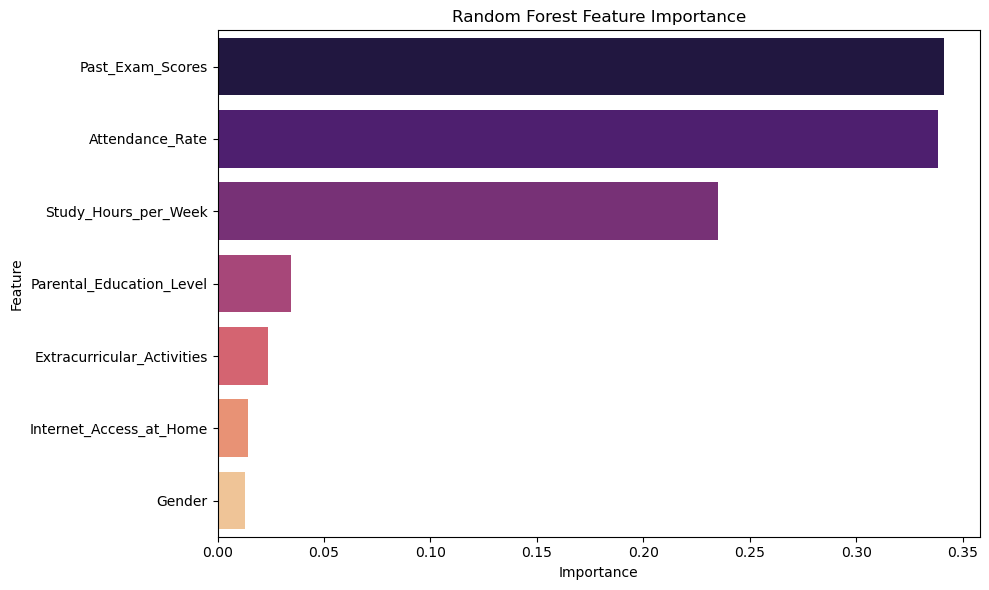

,Feature,Importance
3,Past_Exam_Scores,0.341010
2,Attendance_Rate,0.338163
1,Study_Hours_per_Week,0.235167
4,Parental_Education_Level,0.034575
6,Extracurricular_Activities,0.023605
5,Internet_Access_at_Home,0.014535
0,Gender,0.012946


In [69]:
# Visualize feature importance 
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='magma')
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

feature_importance_df

# VISUALIZE PREDICTED VS ACTUALS SCORES

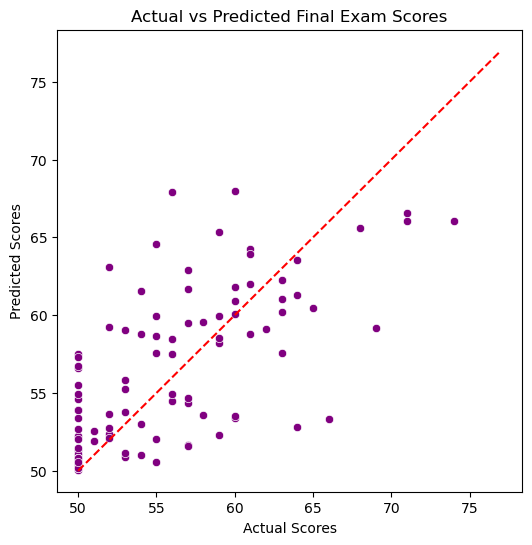

In [70]:
# Visualize Predictions vs Actuals
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Final Exam Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  
plt.show()


# VISUALIZE LEARNING CURVE

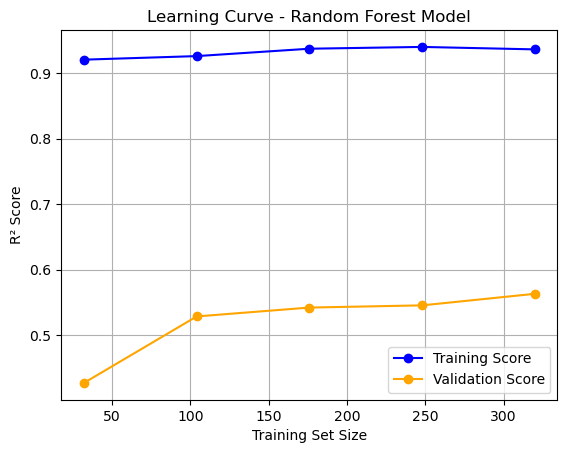

In [71]:
# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    rf, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='r2'
)

# Mean scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
plt.plot(train_sizes, test_mean, 'o-', color='orange', label='Validation Score')

plt.title("Learning Curve - Random Forest Model")
plt.xlabel("Training Set Size")
plt.ylabel("R² Score")
plt.legend(loc='best')
plt.grid(True)
plt.show()